In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
# Import data
df = pd.read_csv(r"C:\Users\henry\OneDrive - Louisiana State University\Desktop\Personal Career\Dota2Predictor\dota.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
df.tail()

,MatchID,Date,Hero,Match Duration,Result,Kills,Deaths,Assists,Networth,Team,Enemy_pos1,Enemy_pos2,Enemy_pos3,Enemy_pos4,Enemy_pos5,Ally_pos1,Ally_pos2,Ally_pos3,Ally_pos4
285,6.338322e+09,12/24/2021 3:36,lion,35:36:00,Lost,2.0,5.0,9.0,6500.0,Dire,medusa,templar_assassin,death_prophet,wisp,mirana,phantom_assassin,ember_spirit,magnataur,techies
286,6.338272e+09,12/24/2021 2:48,crystal_maiden,34:35:00,Won,13.0,6.0,21.0,11400.0,Radiant,juggernaut,skywrath_mage,legion_commander,weaver,ogre_magi,nevermore,invoker,spirit_breaker,snapfire
287,6.338214e+09,12/24/2021 1:53,rubick,34:54:00,Won,6.0,7.0,23.0,13600.0,Dire,life_stealer,pugna,phoenix,earth_spirit,silencer,skeleton_king,monkey_king,abyssal_underlord,ancient_apparition
288,6.338081e+09,12/23/2021 23:21,crystal_maiden,33:23:00,Won,2.0,3.0,16.0,9400.0,Dire,pudge,queenofpain,leshrac,witch_doctor,keeper_of_the_light,legion_commander,earth_spirit,nevermore,crystal_maiden
289,6.336077e+09,12/22/2021 19:19,crystal_maiden,36:17:00,Lost,5.0,9.0,18.0,7500.0,Radiant,phantom_lancer,obsidian_destroyer,snapfire,pudge,hoodwink,faceless_void,invoker,night_stalker,tusk


### Change Hero names to familiar names and remove out of position heroes

#### Position 1 Enemy Heroes

In [6]:
hero_count_pos3 = df['Enemy_pos3'].value_counts()

In [7]:
drop_heroes = hero_count_pos3[hero_count_pos3 < 5].index

In [8]:
hero_count_pos3 = hero_count_pos3.drop(drop_heroes)

In [9]:
enemy_heroes_pos3 = sorted(hero_count_pos3.to_dict())

In [10]:
enemy_pos3_winrates = {}

for hero in enemy_heroes_pos3:
    matches_of_hero = df[df['Enemy_pos3'] == hero]
    num_matches = len(matches_of_hero)
    num_won_matches = len(matches_of_hero[matches_of_hero['Result'] == 'Won'] == True)
    winrate = round(num_won_matches/num_matches * 100,2)
    enemy_pos3_winrates[hero] = winrate

In [11]:
descending_by_winrate = dict(sorted(enemy_pos3_winrates.items(), key=lambda item : item[1], reverse= True))

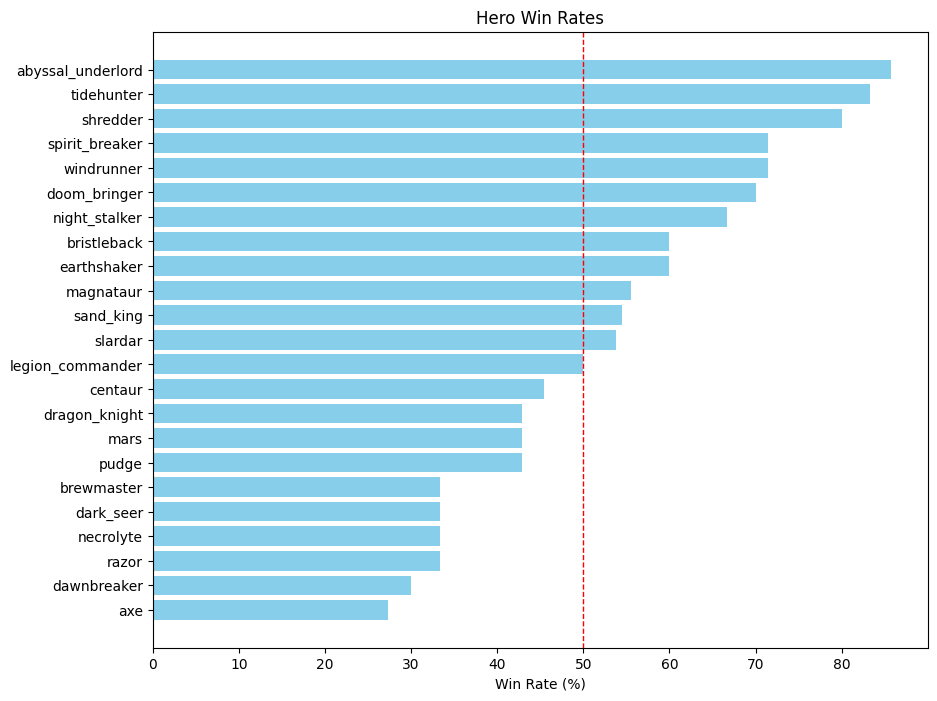

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
heroes = list(descending_by_winrate.keys())
win_rates = list(descending_by_winrate.values())

ax.barh(heroes, win_rates, color='skyblue')

ax.set_xlabel('Win Rate (%)')
ax.set_title('Hero Win Rates')

plt.gca().invert_yaxis()  # Invert the y-axis to display heroes with the highest win rate at the top
ax.axvline(x=50, color='red', linestyle='--', linewidth=1)
plt.show()

### Graph Deaths vs. hero winrates

In [13]:
descending_by_winrate

{'abyssal_underlord': 85.71,
 'tidehunter': 83.33,
 'shredder': 80.0,
 'spirit_breaker': 71.43,
 'windrunner': 71.43,
 'doom_bringer': 70.0,
 'night_stalker': 66.67,
 'bristleback': 60.0,
 'earthshaker': 60.0,
 'magnataur': 55.56,
 'sand_king': 54.55,
 'slardar': 53.85,
 'legion_commander': 50.0,
 'centaur': 45.45,
 'dragon_knight': 42.86,
 'mars': 42.86,
 'pudge': 42.86,
 'brewmaster': 33.33,
 'dark_seer': 33.33,
 'necrolyte': 33.33,
 'razor': 33.33,
 'dawnbreaker': 30.0,
 'axe': 27.27}

In [14]:
filter = df[df['Enemy_pos3'] == 'gyrocopter']

In [15]:
enemy_pos3_deaths = {}

for hero in descending_by_winrate.keys():
    filter = df[df['Enemy_pos3'] == hero]

    avg_deaths = round(filter['Deaths'].mean(),2)
    enemy_pos3_deaths[hero] = avg_deaths
    
    

In [16]:
enemy_pos3_deaths

{'abyssal_underlord': 5.57,
 'tidehunter': 6.5,
 'shredder': 5.4,
 'spirit_breaker': 9.43,
 'windrunner': 7.29,
 'doom_bringer': 6.5,
 'night_stalker': 8.5,
 'bristleback': 5.6,
 'earthshaker': 6.6,
 'magnataur': 7.44,
 'sand_king': 6.64,
 'slardar': 8.15,
 'legion_commander': 6.79,
 'centaur': 7.0,
 'dragon_knight': 6.14,
 'mars': 7.43,
 'pudge': 7.29,
 'brewmaster': 7.83,
 'dark_seer': 9.0,
 'necrolyte': 6.83,
 'razor': 8.17,
 'dawnbreaker': 6.4,
 'axe': 7.55}

In [17]:
descending_by_deaths = dict(sorted(enemy_pos3_deaths.items(), key=lambda item : item[1], reverse= True))

In [18]:
descending_by_deaths

{'spirit_breaker': 9.43,
 'dark_seer': 9.0,
 'night_stalker': 8.5,
 'razor': 8.17,
 'slardar': 8.15,
 'brewmaster': 7.83,
 'axe': 7.55,
 'magnataur': 7.44,
 'mars': 7.43,
 'windrunner': 7.29,
 'pudge': 7.29,
 'centaur': 7.0,
 'necrolyte': 6.83,
 'legion_commander': 6.79,
 'sand_king': 6.64,
 'earthshaker': 6.6,
 'tidehunter': 6.5,
 'doom_bringer': 6.5,
 'dawnbreaker': 6.4,
 'dragon_knight': 6.14,
 'bristleback': 5.6,
 'abyssal_underlord': 5.57,
 'shredder': 5.4}

In [19]:
for hero,winrate in descending_by_winrate.items():
    descending_by_winrate[hero] = np.float64(descending_by_winrate[hero])

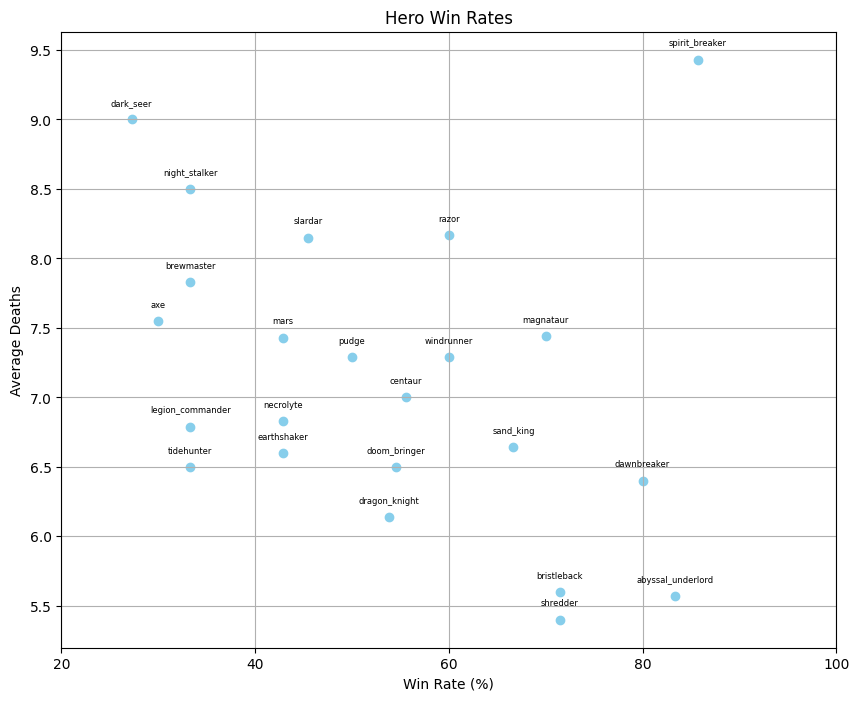

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))

# Scatterplot
heroes = descending_by_deaths.keys()
scatter = ax.scatter(list(enemy_pos3_winrates.values()), list(descending_by_deaths.values()), color='skyblue')

# Label each point with its respective hero name
for hero, deaths, winrate in zip(heroes, descending_by_deaths.values(), enemy_pos3_winrates.values()):
    ax.annotate(hero, (winrate, deaths), textcoords="offset points", xytext=(0, 10), ha='center', fontsize = '6')

# Set axis labels and title
ax.set_xlabel('Win Rate (%)')
ax.set_ylabel('Average Deaths')
ax.set_title('Hero Win Rates')

# Set custom tick marks for the x-axis
x_ticks = [20, 40, 60, 80, 100]
ax.set_xticks(x_ticks)

# Invert the y-axis to display heroes with the highest win rate at the top


# Show the plot
plt.grid(True)
plt.show()